Justificativa para a escolha de classificação como abordagem para o problema

A variável-alvo no conjunto de dados, denominada crop, é categórica, indicando diferentes tipos de culturas, como "rice" e possivelmente outras categorias. Isso caracteriza o problema como uma tarefa de classificação, e a escolha é fundamentada nos seguintes aspectos:

Natureza da variável-alvo:
A variável crop não assume valores numéricos ou contínuos, mas sim categorias nominais, que representam diferentes classes de culturas. Para problemas em que o objetivo é prever a qual categoria uma instância pertence, o tipo de abordagem mais adequado é a classificação.

Objetivo do problema:
A meta do modelo é determinar qual cultura é mais apropriada para uma dada condição de solo, baseada em características como os níveis de nutrientes (N, P, K) e o pH (ph). Esse objetivo exige a identificação de padrões nas variáveis independentes que correspondam a categorias específicas, o que reforça a adequação dos modelos de classificação.

Inadequação de outros tipos de abordagem:
Técnicas de regressão, que modelam relações entre variáveis independentes e uma variável-alvo contínua, não se aplicam aqui, pois a variável crop não é numérica nem possui ordem lógica que permita tratá-la como ordinal. A natureza nominal da variável demanda um método que trate de classes distintas.

Modelos mais adequados para o problema:
Modelos de classificação, como Regressão Logística, Árvores de Decisão, Random Forest, Gradient Boosting, entre outros, são projetados para lidar com variáveis categóricas e encontrar os padrões necessários para prever a classe da variável-alvo.

Portanto, a escolha da classificação é justificada pela natureza dos dados e pelo objetivo do problema, que está diretamente ligado à previsão de categorias nominais.

Modelos a serem testados

Logistic Regression (Regressão Logística)</br>
Decision Tree Classifier (Árvore de Decisão)</br>
Random Forest Classifier</br>
XGBoost Classifier</br>


### Imports

In [12]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


In [13]:


# Carregar os dados
file_path = 'C:\\Users\\Marcelo\\machine_learning_trabalho\\data\\processed\\soil_data_no_outliers.csv'
data = pd.read_csv(file_path)

# Separar variáveis independentes (X) e dependente (y)
X = data[['N', 'P', 'K', 'ph']]
y = data['crop']

# Codificar a variável categórica (y) para numérica
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Padronizar as variáveis independentes (normalização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo de Regressão Logística
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = logistic_model.predict(X_test_scaled)

# Gerar o relatório de classificação
class_report = classification_report(
    y_test, y_pred, target_names=label_encoder.classes_
)
print(class_report)


              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        30
   blackgram       0.77      0.67      0.71        30
    chickpea       1.00      1.00      1.00        26
     coconut       0.74      0.77      0.75        30
      coffee       1.00      0.97      0.98        30
      cotton       0.97      0.97      0.97        30
        jute       0.59      0.57      0.58        30
 kidneybeans       0.36      0.40      0.38        30
      lentil       0.53      0.67      0.59        30
       maize       0.94      1.00      0.97        30
       mango       0.74      0.67      0.70        30
   mothbeans       0.00      0.00      0.00        17
    mungbean       0.62      0.87      0.72        30
   muskmelon       0.61      0.63      0.62        30
      orange       1.00      1.00      1.00        30
      papaya       0.88      1.00      0.94        30
  pigeonpeas       0.21      0.20      0.21        30
 pomegranate       0.87    

c:\Users\Marcelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marcelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marcelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Métricas Gerais:</br>
Acurácia: 73%</br>
Média Macro (média simples das métricas por classe):</br>
Precisão: 0.70</br>
Recall: 0.72</br>
F1-Score: 0.71</br>
Média Ponderada (considerando o suporte de cada classe):</br>
Precisão: 0.72</br>
Recall: 0.73</br>
F1-Score: 0.72 </br>

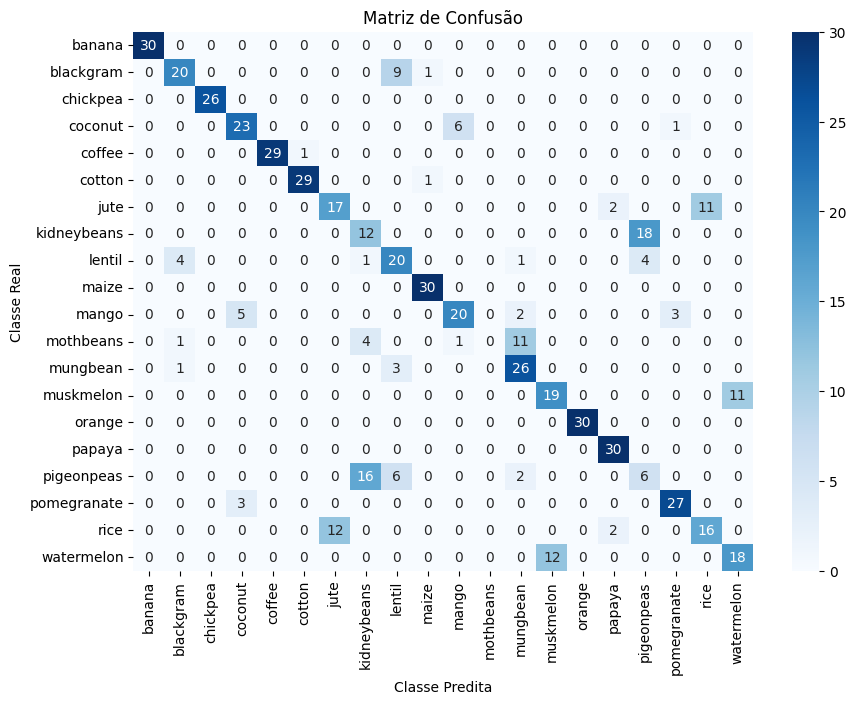

In [14]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()

#### Decision Tree Classifier (Árvore de Decisão)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Instanciar o modelo de Árvore de Decisão
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
decision_tree_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_tree = decision_tree_model.predict(X_test)

# Gerar o relatório de avaliação
tree_report = classification_report(y_test, y_pred_tree)

# Exibir o relatório
print("Relatório de Desempenho - Decision Tree Classifier:")
print(tree_report)

Relatório de Desempenho - Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.75      0.80      0.77        30
           2       1.00      0.96      0.98        26
           3       0.79      0.77      0.78        30
           4       0.90      0.93      0.92        30
           5       0.93      0.93      0.93        30
           6       0.56      0.73      0.64        30
           7       0.75      0.70      0.72        30
           8       0.45      0.50      0.48        30
           9       1.00      0.97      0.98        30
          10       0.76      0.73      0.75        30
          11       0.73      0.65      0.69        17
          12       0.80      0.80      0.80        30
          13       0.61      0.57      0.59        30
          14       1.00      1.00      1.00        30
          15       0.97      1.00      0.98        30
          16       0.42      

Métricas Gerais:
Acurácia: 78% </br>
Média Macro (média simples das métricas por classe):
Precisão: 78%</br>
Recall: 78%</br>
F1-Score: 78%</br>
Média Ponderada (considerando o suporte de cada classe):
Precisão: 78%</br>
Recall: 78%</br>
F1-Score: 78%</br>

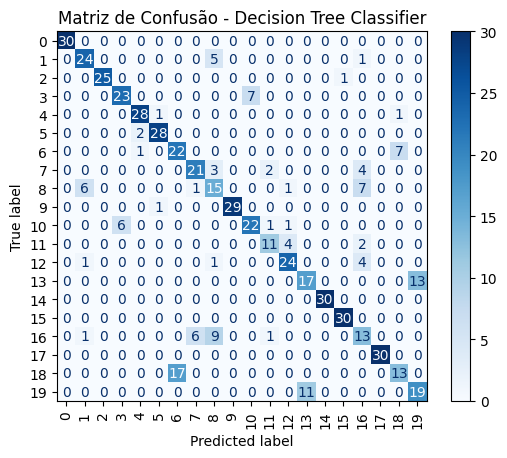

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gerar a matriz de confusão
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Exibir a matriz de confusão como um gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tree, display_labels=decision_tree_model.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

# Ajustar título e exibição
plt.title("Matriz de Confusão - Decision Tree Classifier")
plt.show()

In [17]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### XGBoost

In [18]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Instanciar o modelo XGBoost
xgboost_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Treinar o modelo
xgboost_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_xgb = xgboost_model.predict(X_test)

# Gerar o relatório de avaliação
xgb_report = classification_report(y_test, y_pred_xgb)

# Exibir o relatório
print("Relatório de Desempenho - XGBoost:")
print(xgb_report)

c:\Users\Marcelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:38:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de Desempenho - XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.77      0.77      0.77        30
           2       1.00      1.00      1.00        26
           3       0.85      0.77      0.81        30
           4       1.00      0.97      0.98        30
           5       0.94      1.00      0.97        30
           6       0.62      0.70      0.66        30
           7       0.75      0.70      0.72        30
           8       0.47      0.60      0.53        30
           9       1.00      0.97      0.98        30
          10       0.76      0.73      0.75        30
          11       0.76      0.76      0.76        17
          12       0.77      0.80      0.79        30
          13       0.62      0.53      0.57        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       0.56      0.50      0.53   

Métricas Gerais:
Acurácia: 80% </br>
Média Macro (média simples das métricas por classe):
Precisão: 81%</br>
Recall: 80%</br>
F1-Score: 80%</br>
Média Ponderada (considerando o suporte de cada classe):
Precisão: 80%</br>
Recall: 80%</br>
F1-Score: 80%</br>

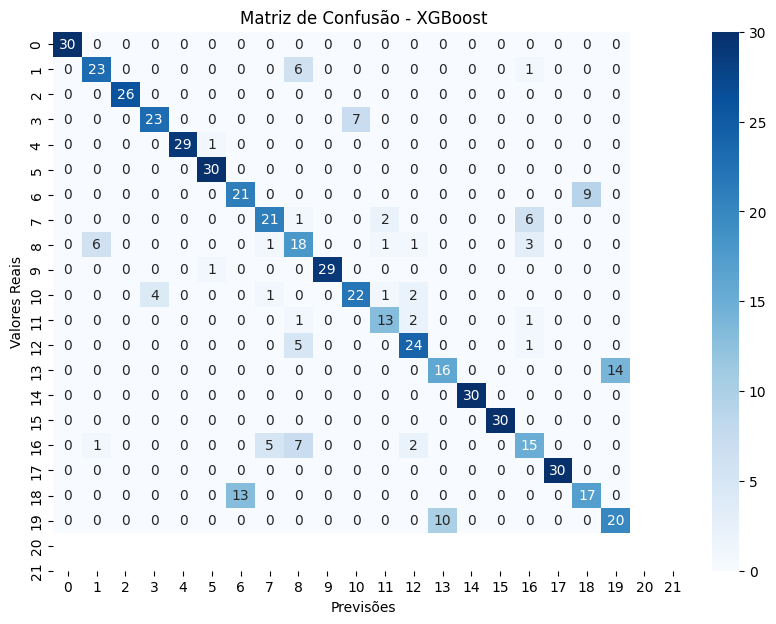

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plotando a matriz de confusão com o seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=range(22), yticklabels=range(22))
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Instanciar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Gerar o relatório de avaliação
rf_report = classification_report(y_test, y_pred_rf)
print("Relatório de Desempenho - Random Forest:")
print(rf_report)

Relatório de Desempenho - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.75      0.90      0.82        30
           2       1.00      1.00      1.00        26
           3       0.84      0.90      0.87        30
           4       1.00      0.97      0.98        30
           5       0.94      1.00      0.97        30
           6       0.62      0.83      0.71        30
           7       0.76      0.83      0.79        30
           8       0.56      0.63      0.59        30
           9       1.00      0.97      0.98        30
          10       0.88      0.77      0.82        30
          11       0.92      0.65      0.76        17
          12       0.76      0.87      0.81        30
          13       0.63      0.63      0.63        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       0.60      0.40      0

Métricas Gerais:
Acurácia: 83% </br>
Média Macro (média simples das métricas por classe):
Precisão: 83%</br>
Recall: 82%</br>
F1-Score: 82%</br>
Média Ponderada (considerando o suporte de cada classe):
Precisão: 83%</br>
Recall: 83%</br>
F1-Score: 82%</br>

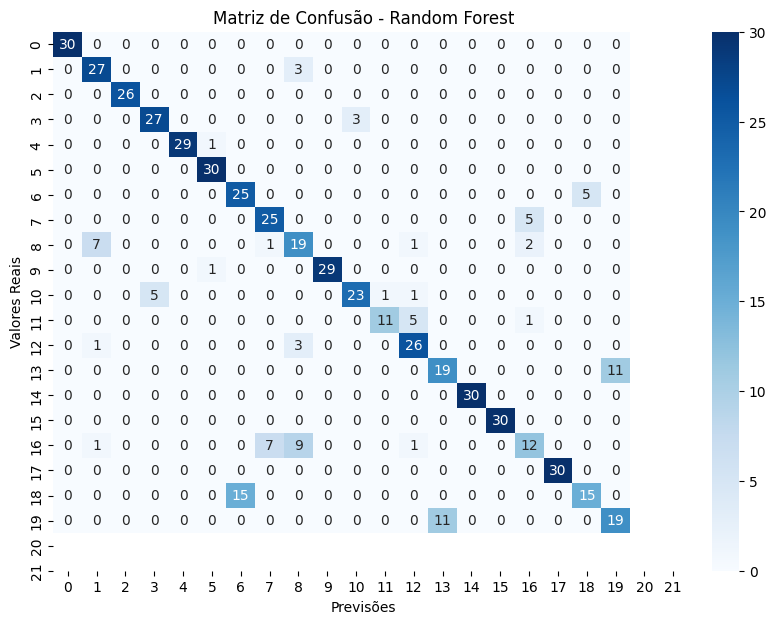

In [21]:
# Gerar a matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotando a matriz de confusão com o seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=range(22), yticklabels=range(22))
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

#### Justificativa da Métrica Utilizada para a Escolha do Modelo

A escolha das métricas de avaliação foi fundamental para a compreensão do desempenho do modelo de Random Forest no contexto da classificação do tipo de cultivo com base nas variáveis disponíveis. Para este problema, utilizamos as seguintes métricas principais: Acurácia, Média Macro, e Média Ponderada.

#### Conclusão

O modelo Random Forest demonstrou um bom desempenho geral na tarefa de classificação do tipo de cultivo, com uma acurácia de 83%, o que é um indicativo de que o modelo está acertando a maior parte das classificações. As médias macro e ponderadas confirmam que o modelo está equilibrado em relação a todas as classes, com um bom desempenho tanto nas classes mais representadas quanto nas menos representadas.

Entretanto, ao observarmos as métricas de cada classe, notamos que algumas classes, como Pigeonpeas e Mothbeans, apresentaram desempenho inferior, com F1-Scores próximos de 0, o que indica que o modelo tem dificuldades em classificar corretamente essas classes. Esses resultados sugerem que, embora o modelo tenha um desempenho geral bom, há oportunidades de melhorias, como a busca por técnicas que possam ajudar a melhorar a identificação de classes menos representadas ou mais difíceis de classificar.

A Random Forest se mostrou uma escolha sólida para este problema, com seu desempenho robusto e sua capacidade de lidar com a complexidade dos dados, mas pode ser interessante considerar ajustes como a otimização de hiperparâmetros ou o uso de técnicas de balanceamento de classes para melhorar ainda mais os resultados em classes com desempenho inferior.